In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [69]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [13]:
# Continuous to discrete

n = 5
bin_width = 100/n
print(bin_width)

bin020 = [0,bin_width]
bin2040 = [bin_width,bin_width*2]
bin4060 = [bin_width*2,bin_width*3]
bin6080 = [bin_width*3,bin_width*4]
bin80100 = [bin_width*4,bin_width*5]

print(bin020)
print(bin2040)
print(bin4060)
print(bin6080)
print(bin80100)

20.0
[0, 20.0]
[20.0, 40.0]
[40.0, 60.0]
[60.0, 80.0]
[80.0, 100.0]


In [ ]:
# Co-occurrence matrix

# min(bin020) < x < max(bin020)
# min(bin2040) < x < max(bin2040)
# min(bin4060) < x < max(bin4060)
# min(bin6080) < x < max(bin6080)
# min(bin80100) < x < max(bin80100)

#         0-20  20-40  40-60  60-80  80-100
# 0-20
# 20-40
# 40-60
# 60-80
# 80-100

#         tree  shrub  grass  crops  urban  bare  water
# tree
# shrub
# grass
# crops
# urban
# bare
# water

In [30]:
pred2015[0:10]

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.0,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.0,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.0,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.0,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.0,0.000000,0.000000,0.0
5,10.344828,20.689655,68.965517,0.0,0.000000,0.000000,0.0
6,0.000000,0.000000,100.000000,0.0,0.000000,0.000000,0.0
7,0.000000,7.594937,92.405063,0.0,0.000000,0.000000,0.0
8,1.219512,14.634146,84.146341,0.0,0.000000,0.000000,0.0
9,19.230769,68.681319,12.087912,0.0,0.000000,0.000000,0.0


In [ ]:
# Check per point if one class occurs (100%)

(round(pred2015) == 100)[1:20].any(axis=1)

In [35]:
(pred2015 > 0).loc[0]

#         tree  shrub  grass  crops  urban  bare  water
# tree          
# shrub                  x             x
# grass           x                    x
# crops
# urban           x      x
# bare
# water

tree              False
shrub              True
grassland          True
crops             False
urban_built_up     True
bare              False
water             False
Name: 0, dtype: bool

In [44]:
matrix = pd.DataFrame(np.zeros((len(classes), len(classes))))
matrix.columns = classes
matrix.index = classes
matrix

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shrub,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grassland,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crops,0.0,0.0,0.0,0.0,0.0,0.0,0.0
urban_built_up,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bare,0.0,0.0,0.0,0.0,0.0,0.0,0.0
water,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
condition = pred2015.iloc[0] > 0
print(condition)

for i in range(len(classes)):
    #print(i)
    #print(condition[i])
    
    if condition[i] == True:
        print(matrix.loc[i])
        #print(matrix)

In [6]:
temp = (pred2015 > 0).astype(int)
#temp = (pred2015.iloc[:3] > 0).astype(int)
temp

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0,1,1,0,1,0,0
1,1,1,1,0,0,0,0
2,1,1,1,0,0,1,0
3,0,1,1,0,1,1,0
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
30484,1,0,0,0,0,0,0
30485,0,0,0,0,0,0,1
30486,0,0,0,0,0,0,1
30487,0,0,1,0,0,0,0


In [35]:
coocc = temp.T.dot(temp)
coocc

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,15323,6587,11059,888,167,148,34
shrub,6587,10434,9962,585,150,1266,28
grassland,11059,9962,19710,1328,195,1473,495
crops,888,585,1328,2479,7,4,4
urban_built_up,167,150,195,7,215,35,1
bare,148,1266,1473,4,35,4515,40
water,34,28,495,4,1,40,2774


In [72]:
coocc

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,15323,6587,11059,888,167,148,34
shrub,6587,10434,9962,585,150,1266,28
grassland,11059,9962,19710,1328,195,1473,495
crops,888,585,1328,2479,7,4,4
urban_built_up,167,150,195,7,215,35,1
bare,148,1266,1473,4,35,4515,40
water,34,28,495,4,1,40,2774


In [88]:
(34-coocc["tree"].mean())/coocc["tree"].std()
znorm.T

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,1.670546,0.272185,0.988013,-0.640046,-0.755456,-0.758497,-0.776745
shrub,0.518329,1.334735,1.234568,-0.755408,-0.847723,-0.610887,-0.873614
grassland,0.634683,0.487844,1.792664,-0.667860,-0.819518,-0.648451,-0.779362
crops,0.143633,-0.187144,0.623971,1.880490,-0.818133,-0.821408,-0.821408
urban_built_up,0.616959,0.432954,0.920026,-1.114855,1.136503,-0.811788,-1.179798
bare,-0.560547,0.120111,0.246136,-0.648217,-0.629343,2.098159,-0.626299
water,-0.436946,-0.442794,0.012393,-0.466187,-0.469111,-0.431098,2.233745


In [80]:
znorm = coocc.apply(lambda x: (x-x.mean())/x.std())
znorm

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,1.670546,0.518329,0.634683,0.143633,0.616959,-0.560547,-0.436946
shrub,0.272185,1.334735,0.487844,-0.187144,0.432954,0.120111,-0.442794
grassland,0.988013,1.234568,1.792664,0.623971,0.920026,0.246136,0.012393
crops,-0.640046,-0.755408,-0.667860,1.880490,-1.114855,-0.648217,-0.466187
urban_built_up,-0.755456,-0.847723,-0.819518,-0.818133,1.136503,-0.629343,-0.469111
bare,-0.758497,-0.610887,-0.648451,-0.821408,-0.811788,2.098159,-0.431098
water,-0.776745,-0.873614,-0.779362,-0.821408,-1.179798,-0.626299,2.233745


In [91]:
znorm.T > 0

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,True,True,True,False,False,False,False
shrub,True,True,True,False,False,False,False
grassland,True,True,True,False,False,False,False
crops,True,False,True,True,False,False,False
urban_built_up,True,True,True,False,True,False,False
bare,False,True,True,False,False,True,False
water,False,False,True,False,False,False,True


In [68]:
pred2015.loc[0:10]

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.0,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.0,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.0,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.0,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.0,0.000000,0.000000,0.0
5,10.344828,20.689655,68.965517,0.0,0.000000,0.000000,0.0
6,0.000000,0.000000,100.000000,0.0,0.000000,0.000000,0.0
7,0.000000,7.594937,92.405063,0.0,0.000000,0.000000,0.0
8,1.219512,14.634146,84.146341,0.0,0.000000,0.000000,0.0
9,19.230769,68.681319,12.087912,0.0,0.000000,0.000000,0.0


In [8]:
np.fill_diagonal(coocc.values, 0)
coocc

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0,6587,11059,888,167,148,34
shrub,6587,0,9962,585,150,1266,28
grassland,11059,9962,0,1328,195,1473,495
crops,888,585,1328,0,7,4,4
urban_built_up,167,150,195,7,0,35,1
bare,148,1266,1473,4,35,0,40
water,34,28,495,4,1,40,0


In [40]:
test = coocc.div(coocc.sum(axis=1), axis=0)
test

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0.447962,0.192569,0.323306,0.025960,0.004882,0.004327,0.000994
shrub,0.227044,0.359644,0.343375,0.020164,0.005170,0.043637,0.000965
grassland,0.250079,0.225272,0.445706,0.030030,0.004410,0.033309,0.011194
crops,0.167705,0.110482,0.250803,0.468178,0.001322,0.000755,0.000755
urban_built_up,0.216883,0.194805,0.253247,0.009091,0.279221,0.045455,0.001299
bare,0.019783,0.169229,0.196899,0.000535,0.004679,0.603529,0.005347
water,0.010071,0.008294,0.146623,0.001185,0.000296,0.011848,0.821682


In [51]:
print(15323+6587+11059+888+167+148+34)
print(coocc.sum())

test.sum(axis=1)

34206
tree              34206
shrub             29012
grassland         44222
crops              5295
urban_built_up      770
bare               7481
water              3376
dtype: int64


tree              1.0
shrub             1.0
grassland         1.0
crops             1.0
urban_built_up    1.0
bare              1.0
water             1.0
dtype: float64

In [101]:
sumsum = coocc.sum().sum()
coocc_norm = coocc / sumsum
print(coocc_norm.sum().sum())
coocc_norm

1.0


,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0.000000,0.095586,0.160480,0.012886,0.002423,0.002148,0.000493
shrub,0.095586,0.000000,0.144561,0.008489,0.002177,0.018371,0.000406
grassland,0.160480,0.144561,0.000000,0.019271,0.002830,0.021375,0.007183
crops,0.012886,0.008489,0.019271,0.000000,0.000102,0.000058,0.000058
urban_built_up,0.002423,0.002177,0.002830,0.000102,0.000000,0.000508,0.000015
bare,0.002148,0.018371,0.021375,0.000058,0.000508,0.000000,0.000580
water,0.000493,0.000406,0.007183,0.000058,0.000015,0.000580,0.000000


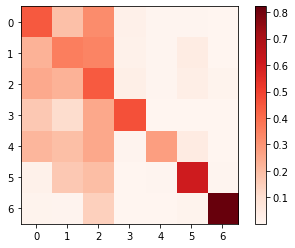

In [54]:
plt.imshow(test,interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.show()

<AxesSubplot:>

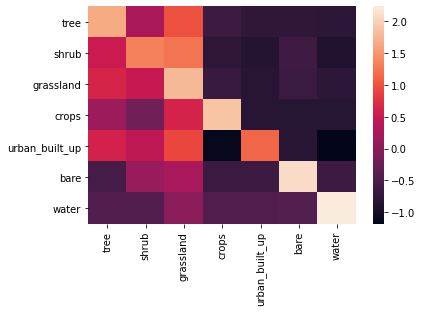

In [89]:
#sns.heatmap(coocc_norm)
sns.heatmap(znorm.T)